# <FONT size=6><u> <i>COVID_19 Dataset</i></u></FONT>

# <b>Import Required  Libraries </b>

In [149]:
import pandas as pd
import plotly.express as px
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())


# <i> <FONT size=10>Data  Exploration</FONT><i>
### Read csv file

In [150]:
CVD=pd.read_csv("C:\\Users\\bisma abbasi\\Desktop\\PK COVID-19-3jun.csv")

## Display whole dataset

In [151]:
CVD

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit
...,...,...,...,...,...,...,...
2793,5/30/2020,952,36,394,NaN,Punjab,Lahore
2794,5/31/2020,1184,22,120,NaN,Punjab,Lahore
2795,6/1/2020,1610,43,95,NaN,Punjab,Lahore
2796,6/2/2020,1639,30,353,NaN,Punjab,Lahore


## Display First Five Records of dataset

In [152]:
CVD.head()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit


## Display last Five Records of dataset

In [153]:
CVD.tail()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
2793,5/30/2020,952,36,394,NaN,Punjab,Lahore
2794,5/31/2020,1184,22,120,NaN,Punjab,Lahore
2795,6/1/2020,1610,43,95,NaN,Punjab,Lahore
2796,6/2/2020,1639,30,353,NaN,Punjab,Lahore
2797,6/3/2020,1615,37,243,NaN,Punjab,Lahore


In [154]:
CVD

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit
...,...,...,...,...,...,...,...
2793,5/30/2020,952,36,394,NaN,Punjab,Lahore
2794,5/31/2020,1184,22,120,NaN,Punjab,Lahore
2795,6/1/2020,1610,43,95,NaN,Punjab,Lahore
2796,6/2/2020,1639,30,353,NaN,Punjab,Lahore


# <u> Data Statistics</u>

## To display total  rows and columns 

In [155]:
CVD.shape

(2798, 7)

My dataset consists of 2798 rows and 8 columns.

In [156]:
CVD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            2798 non-null   object
 1   Cases           2798 non-null   int64 
 2   Deaths          2798 non-null   int64 
 3   Recovered       2798 non-null   int64 
 4   Travel_history  2762 non-null   object
 5   Province        2798 non-null   object
 6   City            2798 non-null   object
dtypes: int64(3), object(4)
memory usage: 153.1+ KB


## To show Datatypes of all columns

In [157]:
CVD.dtypes

Date              object
Cases              int64
Deaths             int64
Recovered          int64
Travel_history    object
Province          object
City              object
dtype: object

## Statistics of numerical columns

In [158]:
CVD.describe()

,Cases,Deaths,Recovered
count,2798.000000,2798.000000,2798.000000
mean,30.016440,0.617584,8.847034
std,128.861666,2.716284,61.362566
min,0.000000,0.000000,-2.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,9.000000,0.000000,1.000000
max,1639.000000,43.000000,1431.000000


## Statistics of Categorical columns

In [159]:
CVD.describe(include="object")

,Date,Travel_history,Province,City
count,2798,2762,2798,2798
unique,91,15,10,132
top,5/30/2020,Local - Social Contact,Khyber Pakhtunkhwa,Karachi
freq,72,2499,1489,95


# To show unique dates,city  and provinces

In [160]:
dates = CVD['Date'].unique()
dates

array(['2/26/2020', '2/29/2020', '3/2/2020', '3/6/2020', '3/7/2020',
       '3/9/2020', '3/10/2020', '3/11/2020', '3/12/2020', '3/13/2020',
       '3/15/2020', '3/16/2020', '3/17/2020', '3/18/2020', '3/19/2020',
       '3/20/2020', '3/21/2020', '3/22/2020', '3/23/2020', '3/24/2020',
       '3/25/2020', '3/26/2020', '3/27/2020', '3/28/2020', '3/29/2020',
       '3/30/2020', '3/31/2020', '4/1/2020', '4/2/2020', '4/3/2020',
       '4/4/2020', '4/5/2020', '4/6/2020', '4/7/2020', '4/8/2020',
       '4/9/2020', '4/10/2020', '4/11/2020', '4/12/2020', '4/13/2020',
       '4/14/2020', '4/15/2020', '4/16/2020', '4/17/2020', '4/18/2020',
       '4/19/2020', '4/20/2020', '4/21/2020', '4/22/2020', '4/23/2020',
       '4/24/2020', '4/25/2020', '4/26/2020', '4/27/2020', '4/28/2020',
       '4/29/2020', '4/30/2020', '5/1/2020', '5/2/2020', '5/3/2020',
       '5/4/2020', '5/5/2020', '5/6/2020', '5/7/2020', '5/8/2020',
       '5/9/2020', '5/10/2020', '5/11/2020', '5/12/2020', '5/13/2020',
       '5/14/2

In [161]:
CVD['Province'].unique()

array(['Islamabad Capital Territory', 'Sindh', 'Gilgit-Baltistan',
       'Baluchistan', 'Punjab', 'Khyber Pakhtunkhwa',
       'khyber Pakhtunkhwa', 'Azad Jummu Kashmir',
       'Federal Administration Tribal Area',
       'islamabad Capital Territory'], dtype=object)

In [162]:
CVD['City'].unique()

array(['Islamabad', 'Karachi', 'Gilgit', 'Quetta', 'Hyderabad', 'Skardu',
       'Taftan', 'Lahore', 'Sukkur', 'Dera Ismail Khan', 'Mardan',
       'Mansehra', 'Peshawar', 'Charsadda', 'Dera Ghazi Khan', 'Mirpur',
       'Buner', 'Mardan ', 'Hangu ', 'Nagar', 'Multan', 'Khyber',
       'Rawalpindi', 'Jehlum', 'Gujrat ', 'Karak', 'Gujranwala', 'Dadu',
       'South Waziristan', 'Sargodha', 'Faisalabad', 'Mandi Bahauddin',
       'Rahim yar khan', 'Astore', 'Kharmang', 'Swabi', 'Gujrat',
       'Dir Upper', 'Swat', 'Mianwali', 'Narowal', 'Nankana', 'Attock',
       'Bahawal Nagar', 'Shigar', 'Shangla', 'Nowshera', 'Orakzai',
       'Malakand', 'Kohat', 'Larkana', 'Dir Lower', 'Abbottabad',
       'Khushab', 'Vehari', 'Raiwind', 'Muzaffarabad', 'Ghanche',
       'Bahawalpur', 'Rahim Yar Khan', 'Bajaur', 'Bannu', 'Kurrum',
       'Haripur', 'Hafizabad', 'Kasur', 'Laiya', 'Jacobabad', 'Bhambore ',
       'Trarkhel', 'Tank', 'Lodhran', 'Sialkot', 'Hangu', 'Chiniot',
       'Sheikhupura', 'La

# <FONT size=6><u>Data Preprocessing</u></FONT>

## Rename column name

In [163]:
CVD.rename(columns={'Cases':'Confirmed_cases','Deaths':'Deaths_cases',"Recovered":"Recovered_cases"},inplace=True)


## Insert an column   of active cases in dataset

In [164]:
CVD['Active_cases']=CVD['Confirmed_cases']-CVD["Deaths_cases"]-CVD["Recovered_cases"]

## Dataframe after addition of active cases columns

In [165]:
CVD

,Date,Confirmed_cases,Deaths_cases,Recovered_cases,Travel_history,Province,City,Active_cases
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad,1
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi,2
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad,1
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi,1
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit,1
...,...,...,...,...,...,...,...,...
2793,5/30/2020,952,36,394,NaN,Punjab,Lahore,522
2794,5/31/2020,1184,22,120,NaN,Punjab,Lahore,1042
2795,6/1/2020,1610,43,95,NaN,Punjab,Lahore,1472
2796,6/2/2020,1639,30,353,NaN,Punjab,Lahore,1256


In [166]:
indexNames = CVD[CVD['Active_cases'] <0 ].index
CVD.drop(indexNames , inplace=True)

In [167]:
CVD

,Date,Confirmed_cases,Deaths_cases,Recovered_cases,Travel_history,Province,City,Active_cases
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad,1
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi,2
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad,1
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi,1
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit,1
...,...,...,...,...,...,...,...,...
2793,5/30/2020,952,36,394,NaN,Punjab,Lahore,522
2794,5/31/2020,1184,22,120,NaN,Punjab,Lahore,1042
2795,6/1/2020,1610,43,95,NaN,Punjab,Lahore,1472
2796,6/2/2020,1639,30,353,NaN,Punjab,Lahore,1256


## Correct all the  wrong(mismatch) province and city entries 

In [168]:

CVD.loc[CVD['City']=='Mardan ','City']='Mardan'
CVD.loc[CVD['City']=='Hangu ','City']='Hangu'
CVD.loc[CVD['City']=='Gujrat ','City']='Gujrat'
CVD.loc[CVD['City']=='ISlamabad','City']='Islamabad'
CVD.loc[CVD['City']=='islamabad','City']='Islamabad'
CVD.loc[CVD['City']=='Rahim yar khan','City']='Rahim_Yar_Khan'
CVD.loc[CVD['City']=='Rahim Yar Khan','City']='Rahim_Yar_Khan'

CVD.loc[CVD['City']=='Shujawal','City']='Sujawal'
CVD.loc[CVD['City']=='Tando Allahyar','City']='Tando_Alahyar'
CVD.loc[CVD['City']=='Tando Alahyar','City']='Tando_Alahyar'

CVD.loc[CVD['City']=='Kurram','City']='Tando_Kurrum'
CVD.loc[CVD['City']=='Tor  Ghar','City']='Tor_Ghar'
CVD.loc[CVD['City']=='Tor Ghar','City']='Tor_Ghar'
CVD.loc[CVD['City']=='Kolai Pallas','City']='Kolai_Pallas'

CVD.loc[CVD['City']=='Kolai Pllas','City']='Kolai_Pallas'
CVD.loc[CVD['City']=='Mirpurkhas','City']='Mirpur_Khas'
CVD.loc[CVD['City']=='Mirpur Khas','City']='Mirpur_Khas'

CVD.loc[CVD['City']=='Torghar','City']='Tor_Ghar'
CVD.loc[CVD['City']=='Dera Ismail Khan','City']='Dera_Ismail_Khan'
CVD.loc[CVD['City']=='South Waziristan','City']='South_Waziristan'
CVD.loc[CVD['City']=='Mandi Bahauddin','City']='Mandi_Bahauddin'
CVD.loc[CVD['City']=='Dir Upper','City']='Dir_Upper'
CVD.loc[CVD['City']=='Dir Lower','City']='Dir_Lower'
CVD.loc[CVD['City']=='Lakki Marwat','City']='Lakki_Marwat'
CVD.loc[CVD['City']=='North Waziristan','City']='North_Waziristan'
CVD.loc[CVD['City']=='Toba Tek Singh','City']='Toba_Tek_Singh'
CVD.loc[CVD['City']=='Shaheed Benazirabad','City']='Shaheed_Benazirabad'
CVD.loc[CVD['City']=='Naushero Feroz','City']='Naushero_Feroz'
CVD.loc[CVD['City']=='Tando M. Khan','City']='Tando_M.Khan'
CVD.loc[CVD['City']=='Kambar Shahdadkot','City']='Kambar_Shahdadkot'
CVD.loc[CVD['City']=='Kohistan upper','City']='Kohistan_upper'
CVD.loc[CVD['City']=='Kohistan Lower','City']='Kohistan_Lower'
CVD.loc[CVD['City']=='Chitral Upper','City']='Chitral_Upper'
CVD.loc[CVD['City']=='Chitral Lower','City']='Chitral_Lower'
CVD.loc[CVD['City']=='Kohistan Upper','City']='Kohistan_Upper'
CVD.loc[CVD['City']=='Dira Ismail Khan','City']='Dira_Ismail_Khan'
CVD.loc[CVD['City']=='Dera Ghazi Khan','City']='Dera_Ghazi_Khan'
CVD.loc[CVD['City']=='Bahawal Nagar','City']='Bahawal_Nagar'
CVD.loc[CVD['City']=='Dira_Ismail_Khan','City']='Dera_Ismail_Khan'   
CVD.loc[CVD['City']=='Kohistan_upper','City']='Kohistan_Upper'
CVD.loc[CVD['City']=='Tando_M.Khan','City']='Tando_M'
CVD.loc[CVD['Province']=='Khyber Pakhtunkhwa','Province']='Khyber_Pakhtunkhwa'

CVD.loc[CVD['Province']=='khyber Pakhtunkhwa','Province']='Khyber_Pakhtunkhwa'
CVD.loc[CVD['Province']=='Gilgit-Baltistan','Province']='Gilgit_Baltistan'
CVD.loc[CVD['Province']=='Islamabad Capital Territory','Province']='Islamabad_Capital_Territory'
CVD.loc[CVD['Province']=='islamabad Capital Territory','Province']='Islamabad_Capital_Territory'

CVD.loc[CVD['Province']=='Azad Jummu Kashmir','Province']='Azad_Jummu_Kashmir'
CVD.loc[CVD['Province']=='Federal Administration Tribal Area','Province']='Federal_Administration_Tribal_Area'
CVD.loc[CVD['Travel_history']=='Local - Social Contact','Travel_history']='Local_Social_Contact'

CVD.loc[CVD['Travel_history']=='Iran/Taftan','Travel_history']='Iran_Taftan'
CVD.loc[CVD['Travel_history']=='Local - Covid Relative','Travel_history']='Local_Covid_Relative'
CVD.loc[CVD['Travel_history']=='Tableeghi Jamaat','Travel_history']='Tableeghi_Jamaat'
CVD.loc[CVD['Travel_history']=='International Passenger','Travel_history']='International_Passenger'


## Display Correct City and Province names

In [169]:
CVD['Province'].unique()

array(['Islamabad_Capital_Territory', 'Sindh', 'Gilgit_Baltistan',
       'Baluchistan', 'Punjab', 'Khyber_Pakhtunkhwa',
       'Azad_Jummu_Kashmir', 'Federal_Administration_Tribal_Area'],
      dtype=object)

In [170]:
CVD['City'].unique()


array(['Islamabad', 'Karachi', 'Gilgit', 'Quetta', 'Hyderabad', 'Skardu',
       'Taftan', 'Lahore', 'Sukkur', 'Dera_Ismail_Khan', 'Mardan',
       'Mansehra', 'Peshawar', 'Charsadda', 'Dera_Ghazi_Khan', 'Mirpur',
       'Buner', 'Hangu', 'Nagar', 'Multan', 'Khyber', 'Rawalpindi',
       'Jehlum', 'Gujrat', 'Karak', 'Gujranwala', 'Dadu',
       'South_Waziristan', 'Sargodha', 'Faisalabad', 'Mandi_Bahauddin',
       'Rahim_Yar_Khan', 'Astore', 'Kharmang', 'Swabi', 'Dir_Upper',
       'Swat', 'Mianwali', 'Narowal', 'Nankana', 'Attock',
       'Bahawal_Nagar', 'Shigar', 'Shangla', 'Nowshera', 'Orakzai',
       'Malakand', 'Kohat', 'Larkana', 'Dir_Lower', 'Abbottabad',
       'Khushab', 'Vehari', 'Raiwind', 'Muzaffarabad', 'Ghanche',
       'Bahawalpur', 'Bajaur', 'Bannu', 'Kurrum', 'Haripur', 'Hafizabad',
       'Kasur', 'Laiya', 'Jacobabad', 'Bhambore ', 'Trarkhel', 'Tank',
       'Lodhran', 'Sialkot', 'Chiniot', 'Sheikhupura', 'Lakki_Marwat',
       'Tor_Ghar', 'North_Waziristan', 'Mohm

In [171]:
CVD['Travel_history'].unique()

array(['China', 'Iran_Taftan', 'Syria', 'UK', 'Local_Social_Contact',
       'USA', 'Unknown', 'KSA', 'Local_Covid_Relative', 'Dubai',
       'International_Passenger', 'Tableeghi_Jamaat', 'Jail',
       'Afghanistan', nan], dtype=object)

## Change datatype of Date column

In [172]:
CVD['Date'] =pd.to_datetime(CVD['Date'], infer_datetime_format=True)


# Show the starting, ending date and total days  of our dataset

In [173]:

print(f"Earliest Entry: {CVD['Date'].min()}")
print(f"Last Entry:     {CVD['Date'].max()}")
print(f"Total Days:     {CVD['Date'].max()-CVD['Date'].min()}")

Earliest Entry: 2020-02-26 00:00:00
Last Entry:     2020-06-03 00:00:00
Total Days:     98 days 00:00:00


## Change the Datatype of Date column

In [174]:
CVD['Date'] =pd.to_datetime(CVD['Date'], infer_datetime_format=True)

In [175]:
CVD.dtypes

Date               datetime64[ns]
Confirmed_cases             int64
Deaths_cases                int64
Recovered_cases             int64
Travel_history             object
Province                   object
City                       object
Active_cases                int64
dtype: object

## Determine null values

In [176]:
CVD.isnull().sum()

Date                0
Confirmed_cases     0
Deaths_cases        0
Recovered_cases     0
Travel_history     31
Province            0
City                0
Active_cases        0
dtype: int64

Above analysis show that my dataset contain null values so much be removed or  can  be repalce with  mean median or nmode also..

## Drop those rows which consist of any null values

In [1]:
CVD.dropna(axis=0, inplace=True)


NameError: name 'CVD' is not defined

## Show null values remove from dataframe or not

In [178]:
CVD.isnull().sum()

Date               0
Confirmed_cases    0
Deaths_cases       0
Recovered_cases    0
Travel_history     0
Province           0
City               0
Active_cases       0
dtype: int64

 This show that now our dataset does not contain any null value.

# Determine if data has any dulpicated value

In [179]:
CVD.duplicated(subset=None,keep='first').sum()

1

In [180]:
duplicateRows = CVD[CVD.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRows)

Duplicate Rows except first occurrence based on all columns are :
           Date  Confirmed_cases  Deaths_cases  Recovered_cases  \
1560 2020-05-13                1             0                0   

            Travel_history          Province    City  Active_cases  
1560  Local_Social_Contact  Gilgit_Baltistan  Ghizer             1  


# Drop duplicates rows

In [181]:
CVD.drop_duplicates( keep = False, inplace = True)
CVD

,Date,Confirmed_cases,Deaths_cases,Recovered_cases,Travel_history,Province,City,Active_cases
0,2020-02-26,1,0,0,China,Islamabad_Capital_Territory,Islamabad,1
1,2020-02-26,2,0,0,Iran_Taftan,Sindh,Karachi,2
2,2020-02-29,1,0,0,China,Islamabad_Capital_Territory,Islamabad,1
3,2020-02-29,1,0,0,Iran_Taftan,Sindh,Karachi,1
4,2020-03-02,1,0,0,Iran_Taftan,Gilgit_Baltistan,Gilgit,1
...,...,...,...,...,...,...,...,...
2754,2020-05-27,5,1,0,Local_Social_Contact,Azad_Jummu_Kashmir,Muzaffarabad,4
2755,2020-05-28,8,0,0,Local_Social_Contact,Azad_Jummu_Kashmir,Muzaffarabad,8
2756,2020-05-29,7,1,6,Local_Social_Contact,Azad_Jummu_Kashmir,Muzaffarabad,0
2759,2020-06-01,16,0,2,Local_Social_Contact,Azad_Jummu_Kashmir,Muzaffarabad,14


In [182]:
CVD.duplicated(subset=None,keep='first').sum()

0

In [183]:
CVD['Travel_history'].unique()

array(['China', 'Iran_Taftan', 'Syria', 'UK', 'Local_Social_Contact',
       'USA', 'Unknown', 'KSA', 'Local_Covid_Relative', 'Dubai',
       'International_Passenger', 'Tableeghi_Jamaat', 'Jail',
       'Afghanistan'], dtype=object)

In [184]:
CVD.to_csv("covid2.csv")
CVD.to_excel("covid2.xls")

Now our data does not contain any duplicate value

 now our data is cleaned

# <FONT size=6><i> <u>Data Analysis and Visualization</u></i></FONT>

We will analyze some insights from our datsets in form of visualization

In [185]:
CVD

,Date,Confirmed_cases,Deaths_cases,Recovered_cases,Travel_history,Province,City,Active_cases
0,2020-02-26,1,0,0,China,Islamabad_Capital_Territory,Islamabad,1
1,2020-02-26,2,0,0,Iran_Taftan,Sindh,Karachi,2
2,2020-02-29,1,0,0,China,Islamabad_Capital_Territory,Islamabad,1
3,2020-02-29,1,0,0,Iran_Taftan,Sindh,Karachi,1
4,2020-03-02,1,0,0,Iran_Taftan,Gilgit_Baltistan,Gilgit,1
...,...,...,...,...,...,...,...,...
2754,2020-05-27,5,1,0,Local_Social_Contact,Azad_Jummu_Kashmir,Muzaffarabad,4
2755,2020-05-28,8,0,0,Local_Social_Contact,Azad_Jummu_Kashmir,Muzaffarabad,8
2756,2020-05-29,7,1,6,Local_Social_Contact,Azad_Jummu_Kashmir,Muzaffarabad,0
2759,2020-06-01,16,0,2,Local_Social_Contact,Azad_Jummu_Kashmir,Muzaffarabad,14


## 1.<i> Visualization of numerical columns of dataset</i>

array([[<AxesSubplot:title={'center':'Confirmed_cases'}>,
        <AxesSubplot:title={'center':'Deaths_cases'}>],
       [<AxesSubplot:title={'center':'Recovered_cases'}>,
        <AxesSubplot:title={'center':'Active_cases'}>]], dtype=object)

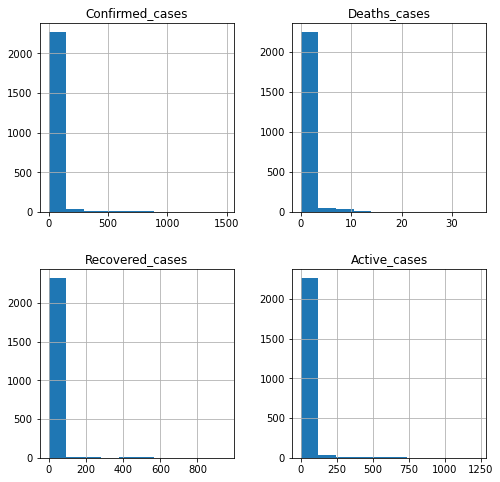

In [186]:
CVD.hist(figsize=(8,8))

## 2.<i> Show  the cities with confirmed cases and determine how many cities have more than 1 case,100 case and thousand  case.</i>

In [187]:
target_date = CVD['Date'].max()

print('Date: ', target_date)
for i in [1, 10, 100, 1000, 10000]:
    n_City = len(CVD.query('(Date == @target_date) & Confirmed_cases > @i'))
    print(f'{n_City} cities have more than {i} confirmed cases')

Date:  2020-06-03 00:00:00
43 cities have more than 1 confirmed cases
22 cities have more than 10 confirmed cases
3 cities have more than 100 confirmed cases
1 cities have more than 1000 confirmed cases
0 cities have more than 10000 confirmed cases


## <i> 3).Show the Confirmed, Active,Death and Recovered cases of each province in one table.</i>

### Numerical visualization

In [104]:
world=CVD.groupby('Province')[['Confirmed_cases','Active_cases','Deaths_cases','Recovered_cases']].sum().reset_index()
world

,Province,Confirmed_cases,Active_cases,Deaths_cases,Recovered_cases
0,Azad_Jummu_Kashmir,248,217,6,25
1,Baluchistan,2389,2127,30,232
2,Federal_Administration_Tribal_Area,52,49,0,3
3,Gilgit_Baltistan,758,688,5,65
4,Islamabad_Capital_Territory,3522,3029,36,457
5,Khyber_Pakhtunkhwa,9963,8591,407,965
6,Punjab,14574,13515,227,832
7,Sindh,29762,19686,477,9599


### Graphical visualization

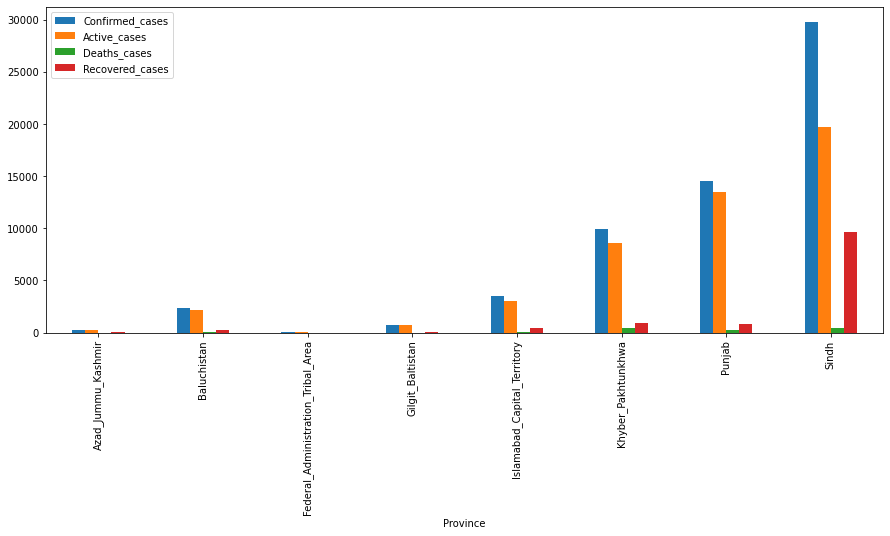

In [105]:
world.plot.bar(x="Province")
plt.gcf().set_size_inches(15, 6)
plt.show()

## <i> Show the Confirmed, Active,Death and Recovered cases of each Travel_history in one table.</i>

In [204]:
world=CVD.groupby('Travel_history')[['Confirmed_cases','Active_cases','Deaths_cases','Recovered_cases']].sum().reset_index()
world

,Travel_history,Confirmed_cases,Active_cases,Deaths_cases,Recovered_cases
0,Afghanistan,70,70,0,0
1,China,2,2,0,0
2,Dubai,1,1,0,0
3,International_Passenger,38,38,0,0
4,Iran_Taftan,1035,1025,6,4
5,Jail,107,107,0,0
6,KSA,6,5,1,0
7,Local_Covid_Relative,1,1,0,0
8,Local_Social_Contact,55449,42456,1103,11890
9,Syria,7,7,0,0


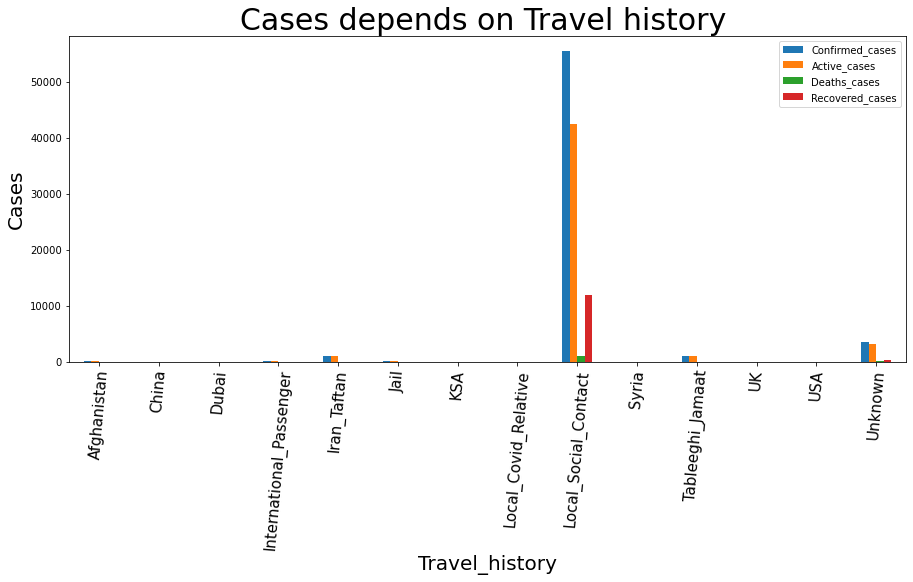

In [205]:

world.plot.bar(x="Travel_history")
plt.xlabel("Travel_history",fontsize = 20)
plt.xticks(rotation = 85 ,fontsize = 15)
plt.ylabel('Cases',fontsize = 20)
plt.title("Cases depends on Travel history " , fontsize = 30)
plt.gcf().set_size_inches(15, 6)
plt.show()

In [206]:
import plotly.express as px
df = px.CVD.tips()
fig = px.histogram(df, x="Province", y="Confirmed_cases", color="sex", marginal="rug", hover_data=df.columns)
fig.show()

AttributeError: module 'plotly.express' has no attribute 'CVD'

## 5). <i>  Show the sum of cases of all province And determine which province face most confirmed cases</i>

### * Tablewise visualization

In [207]:
query_2 ='''SELECT Province,Sum("Confirmed_cases")as Confirmed_cases  FROM CVD GROUP BY Province;'''
res_3 = pysqldf(query_2)
res_3

,Province,Confirmed_cases
0,Azad_Jummu_Kashmir,248
1,Baluchistan,2389
2,Federal_Administration_Tribal_Area,52
3,Gilgit_Baltistan,758
4,Islamabad_Capital_Territory,3522
5,Khyber_Pakhtunkhwa,9963
6,Punjab,14574
7,Sindh,29762


### * Graph Visualization

In [208]:
fig = px.pie(CVD,
             values="Confirmed_cases",
             names="Province",
             title="Confirmed cases",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo='value+label')
fig.show()

Above graph show that  sindh has most confirmed cases

## 6). <i>Show by dataframe provincewise active covid cases and determine which province have most active cases</i>

### * Numerical interpretation

In [209]:
query_2 ='''SELECT Province,Sum("Active_cases")as Active_cases  FROM CVD GROUP BY Province;'''
res_3 = pysqldf(query_2)
res_3

,Province,Active_cases
0,Azad_Jummu_Kashmir,217
1,Baluchistan,2127
2,Federal_Administration_Tribal_Area,49
3,Gilgit_Baltistan,688
4,Islamabad_Capital_Territory,3029
5,Khyber_Pakhtunkhwa,8591
6,Punjab,13515
7,Sindh,19686


### *Graphical visualization

In [210]:
fig = px.pie(CVD,
             values="Active_cases",
             names="Province",
             title="Active cases",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo='value+label')
fig.show()




Aove graph and table show that sidhh have most active cases and punjab also has most active cases but minimum to sindh.

## 7).  <i> Show by table provincewise Deaths covid cases and determine which province have most Deaths cases</i>

### Tablewise Visualization

In [211]:
query_2 ='''SELECT Province,Sum("Deaths_cases")as Deaths_cases  FROM CVD GROUP BY Province;'''
res_3 = pysqldf(query_2)
res_3

,Province,Deaths_cases
0,Azad_Jummu_Kashmir,6
1,Baluchistan,30
2,Federal_Administration_Tribal_Area,0
3,Gilgit_Baltistan,5
4,Islamabad_Capital_Territory,36
5,Khyber_Pakhtunkhwa,407
6,Punjab,227
7,Sindh,477


### Graphical visualization

In [212]:
fig = px.pie(CVD,
             values="Deaths_cases",
             names="Province",
             title="Deaths cases",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo='value+label')
fig.show()

## 8). <i> Show by table provincewise  REcovered covid cases and determine which province have most  Recovered cases</i>

### Numerical visualization

In [213]:
query_2 ='''SELECT Province,Sum("Recovered_cases")as Recovered_cases  FROM CVD GROUP BY Province;'''
res_3 = pysqldf(query_2)
res_3

,Province,Recovered_cases
0,Azad_Jummu_Kashmir,25
1,Baluchistan,232
2,Federal_Administration_Tribal_Area,3
3,Gilgit_Baltistan,65
4,Islamabad_Capital_Territory,457
5,Khyber_Pakhtunkhwa,965
6,Punjab,832
7,Sindh,9599


### Graphical visualization

In [214]:
fig = px.pie(CVD,
             values="Recovered_cases",
             names="Province",
             title="Recovered cases",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo='value+label')
fig.show()

## 9). <i> Show that with passage  of date and month  whether this disease(COVID_19)  increase or decrease.</i>

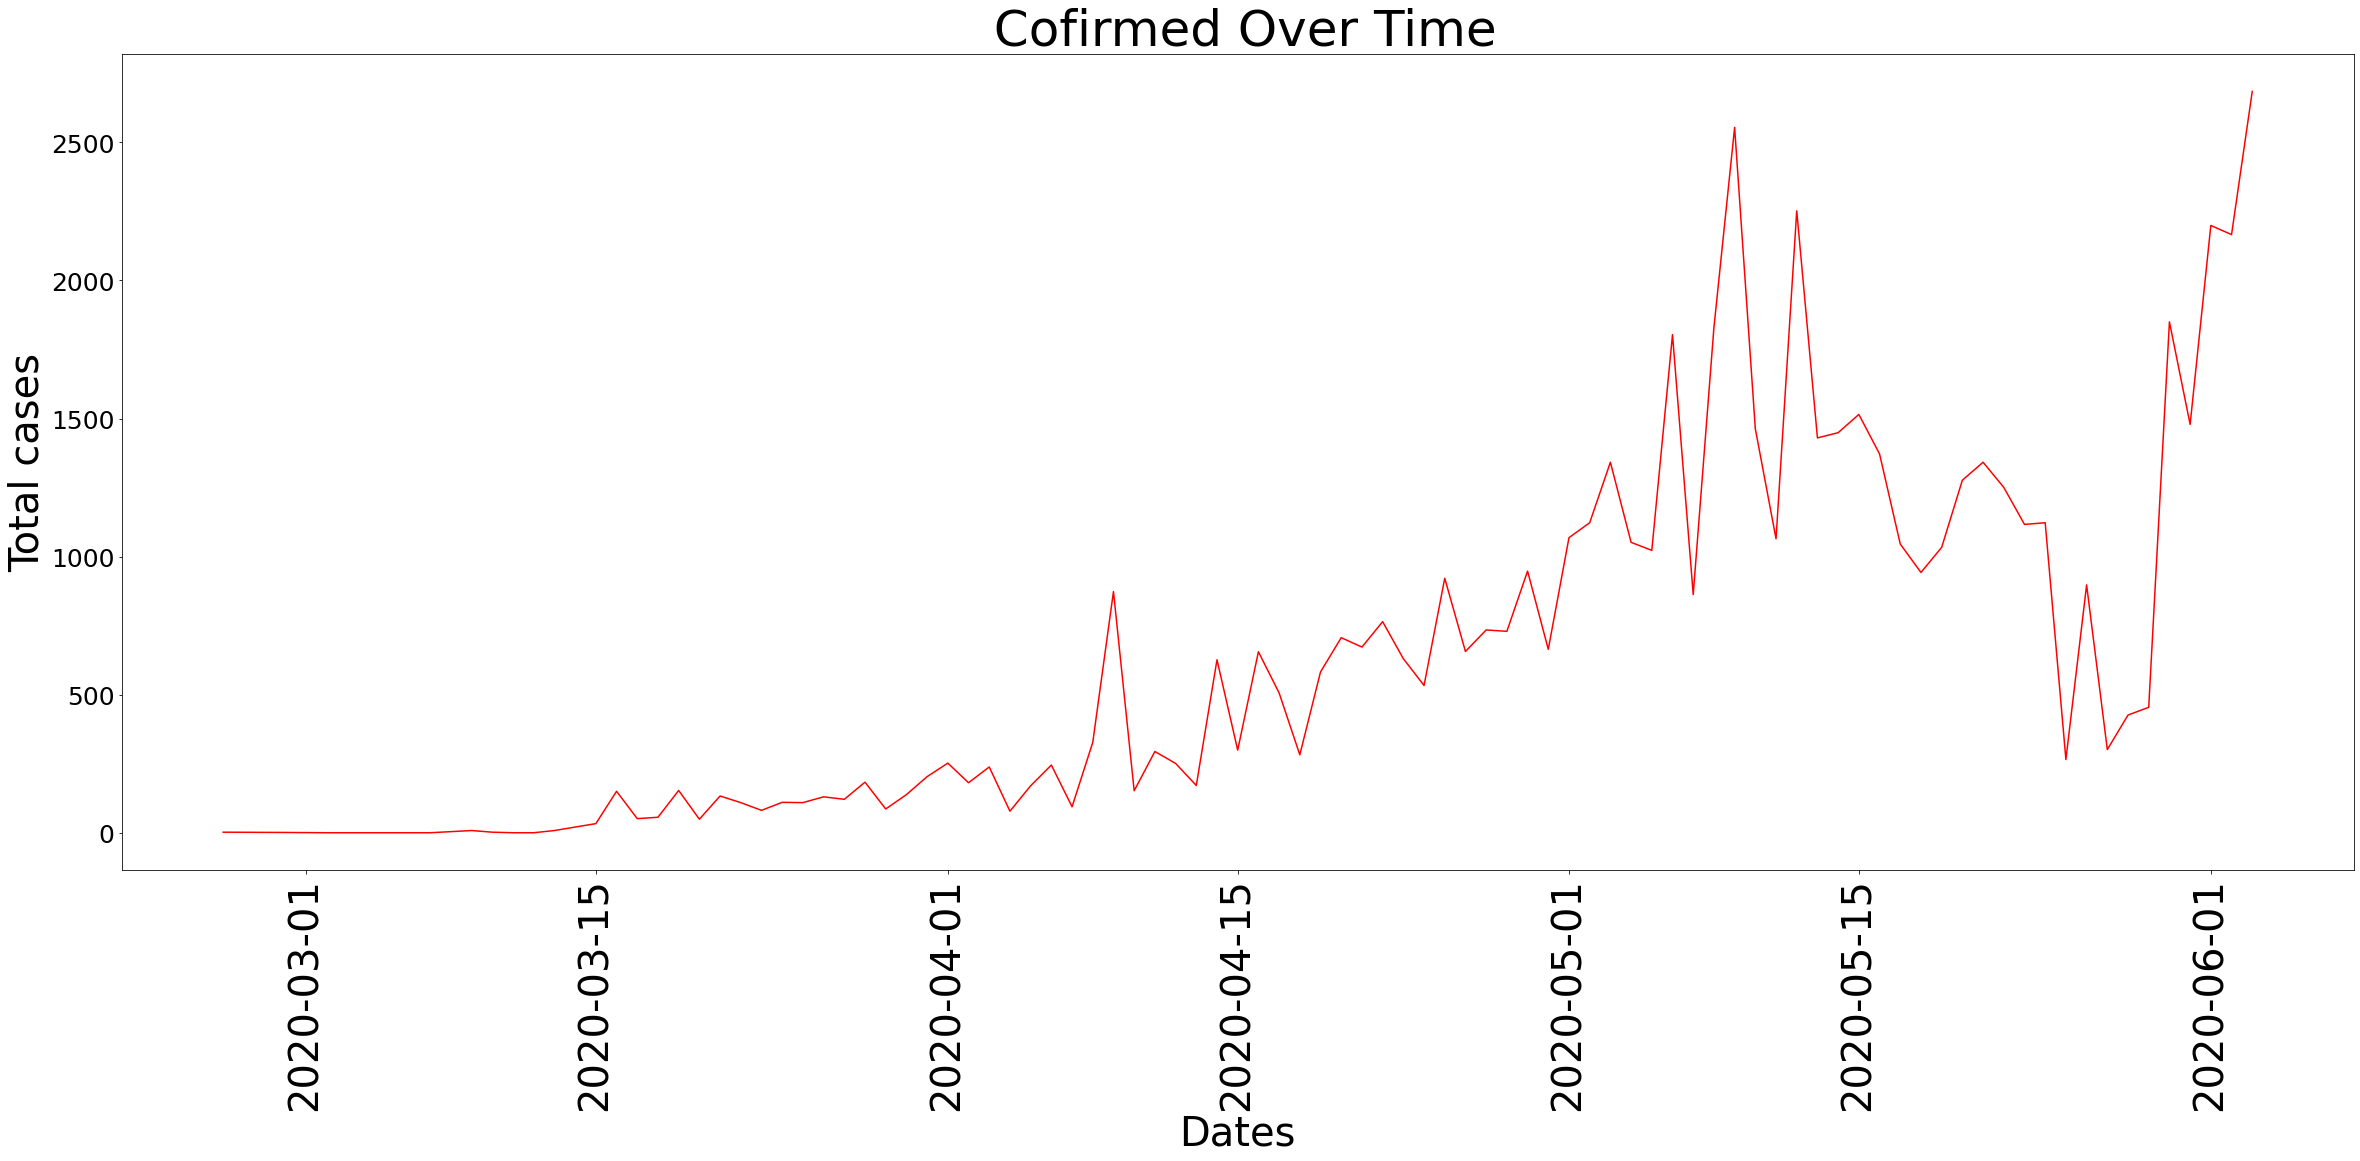

In [215]:

plt.figure(figsize= (40,15))
plt.xticks(rotation = 90 ,fontsize = 40)
plt.yticks(fontsize =25)
plt.xlabel("Dates",fontsize = 40)
plt.ylabel('Total cases',fontsize = 40)
plt.title(" Cofirmed Over Time" , fontsize = 50)
total_cases = CVD.groupby('Date')[['Date', 'Confirmed_cases']].sum().reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
total_cases['Date']
ax = sns.lineplot( x = total_cases.Date,  y = total_cases.Confirmed_cases , color = 'r')




This show that with time covid disease also increase

#### <FONT size=6> <u>NOW WE ANALYZE THE CONDITION OF COVID _19 IN CITIES<i></u>

## 10) .  <i> Show  top 10  cities having most Confirmed cases and determine which city has more cases.</i>

### Numerical visualization

In [216]:
 top=CVD[CVD['Date'] ==CVD['Date']]
top_casualities = top.groupby(by = 'City')['Confirmed_cases'].sum().sort_values(ascending = False).head(10).reset_index()
top_casualities

,City,Confirmed_cases
0,Karachi,26685
1,Lahore,11493
2,Peshawar,4909
3,Islamabad,3522
4,Quetta,2373
5,Swat,887
6,Multan,712
7,Sukkur,630
8,Raiwind,546
9,Hyderabad,527


### Graphical visualization

[Text(0.5, 0, 'Total confirmed  cases'), Text(0, 0.5, 'City')]

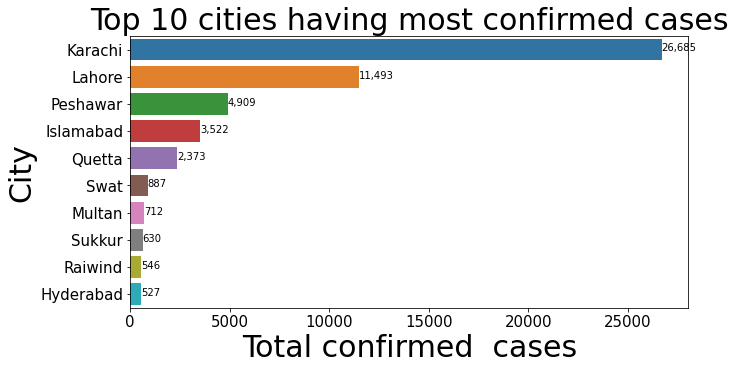

In [217]:
plt.figure(figsize= (10,5))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('City',fontsize = 30)
plt.title("Top 10 cities having most confirmed cases" , fontsize = 30)
ax = sns.barplot(x = top_casualities.Confirmed_cases, y = top_casualities.City)
for i, (value, name) in enumerate(zip(top_casualities.Confirmed_cases,top_casualities.City)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total confirmed  cases', ylabel='City')

Above graph and table show that karachi has most confirmed cases

## 11). <i> Show top 10 cities having most active cases</i>

### Numerical visualization

In [218]:
active=CVD[CVD['Date'] ==CVD['Date']]
active_casualities =active.groupby(by = 'City')['Active_cases'].sum().sort_values(ascending = False).head(10).reset_index()
active_casualities

,City,Active_cases
0,Karachi,17114
1,Lahore,10447
2,Peshawar,4313
3,Islamabad,3029
4,Quetta,2111
5,Multan,709
6,Swat,699
7,Raiwind,544
8,Sukkur,532
9,Malakand,384


### Graphical visualization.

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'City')]

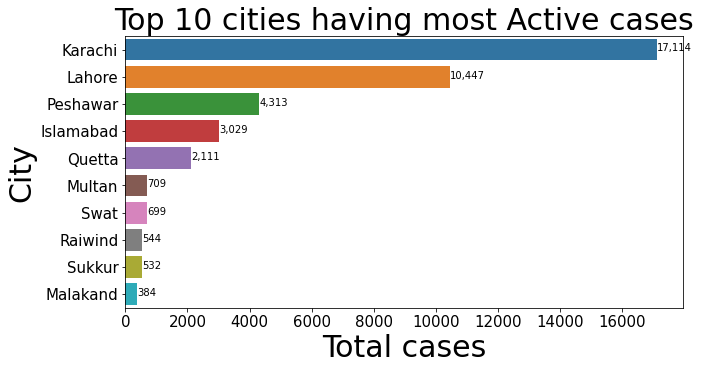

In [219]:
plt.figure(figsize= (10,5))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('City',fontsize = 30)
plt.title("Top 10 cities having most Active cases" , fontsize = 30)
ax = sns.barplot(x = active_casualities.Active_cases, y = active_casualities.City)
for i, (value, name) in enumerate(zip(active_casualities.Active_cases,active_casualities.City)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='City')

# 12). <i> Determine top 10 countries having most deaths cases</i>

### Numerical visualization

In [220]:
death=CVD[CVD['Date'] ==CVD['Date']]
death_casualities = death.groupby(by = 'City')['Deaths_cases'].sum().sort_values(ascending = False).head(10).reset_index()
death_casualities

,City,Deaths_cases
0,Karachi,455
1,Peshawar,252
2,Lahore,219
3,Swat,37
4,Islamabad,36
5,Quetta,30
6,Mardan,22
7,Malakand,13
8,Abbottabad,12
9,Nowshera,11


### Graphical visualization

[Text(0.5, 0, 'Total Deaths'), Text(0, 0.5, 'City')]

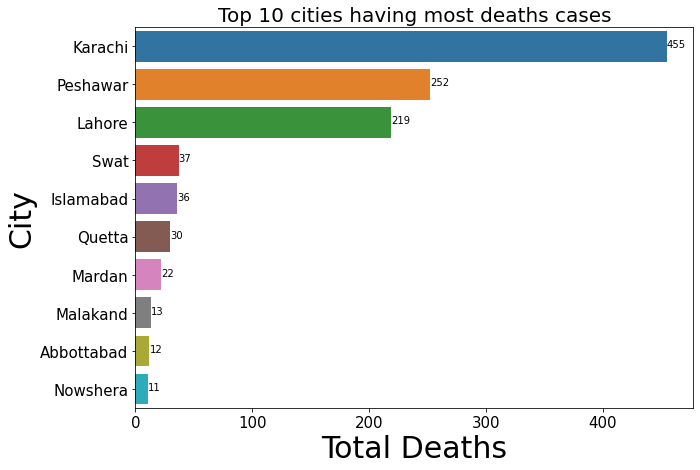

In [221]:
plt.figure(figsize= (10,7))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Deaths",fontsize = 30)
plt.ylabel('City',fontsize = 30)
plt.title("Top 10 cities having most deaths cases" , fontsize = 20)
ax = sns.barplot(x = death_casualities.Deaths_cases, y =death_casualities.City)
for i, (value, name) in enumerate(zip(death_casualities.Deaths_cases,death_casualities.City)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total Deaths', ylabel='City')

## <i> 13).  Show that  10 countries having more Recovered cases</i>

### Numerical visualization

In [222]:
Recovered=CVD[CVD['Date'] ==CVD['Date']]
Recovered_casualities = Recovered.groupby(by = 'City')['Recovered_cases'].sum().sort_values(ascending = False).head(10).reset_index()
Recovered_casualities

,City,Recovered_cases
0,Karachi,9116
1,Lahore,827
2,Islamabad,457
3,Peshawar,344
4,Quetta,232
5,Swat,151
6,Hyderabad,143
7,Sukkur,96
8,Malakand,66
9,Ghotki,56


### Graphical visualization.

[Text(0.5, 0, 'Total Recovered cases'), Text(0, 0.5, 'City')]

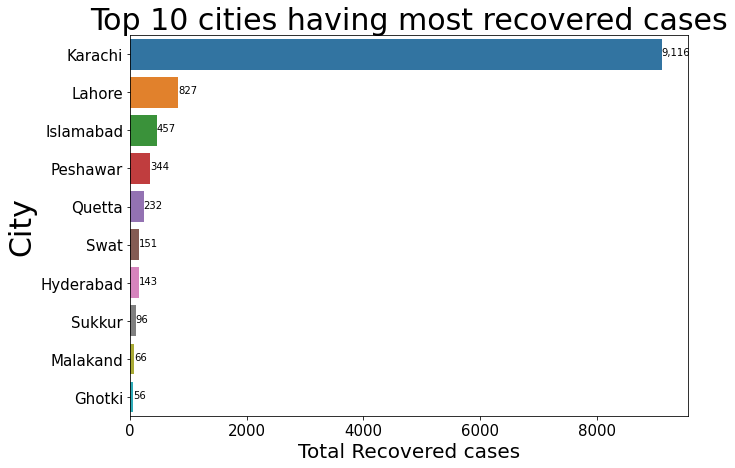

In [223]:
plt.figure(figsize= (10,7))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Recovered",fontsize = 20)
plt.ylabel('City',fontsize = 30)
plt.title("Top 10 cities having most recovered cases" , fontsize = 30)
ax = sns.barplot(x = Recovered_casualities.Recovered_cases, y =Recovered_casualities.City)
for i, (value, name) in enumerate(zip(Recovered_casualities.Recovered_cases,Recovered_casualities.City)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total Recovered cases', ylabel='City')

 Above 4 graphs shows that (KARACHI) have most confirmed,Active,Recovered and Deaths Cases

## <i>14). Show that mortality rate of each Province and determine which Province have greater mortality rate.</i>

### Numerical visualization

In [224]:
rate =CVD.groupby(by = 'Province')[['Recovered_cases','Confirmed_cases','Deaths_cases']].sum().reset_index()
rate['Recovery percentage'] =  round(((rate['Recovered_cases']) / (rate['Confirmed_cases'])) * 100 , 2)
rate['Death percentage'] =  round(((rate['Deaths_cases']) / (rate['Confirmed_cases'])) * 100 , 2)
rate.head()

,Province,Recovered_cases,Confirmed_cases,Deaths_cases,Recovery percentage,Death percentage
0,Azad_Jummu_Kashmir,25,248,6,10.08,2.42
1,Baluchistan,232,2389,30,9.71,1.26
2,Federal_Administration_Tribal_Area,3,52,0,5.77,0.00
3,Gilgit_Baltistan,65,758,5,8.58,0.66
4,Islamabad_Capital_Territory,457,3522,36,12.98,1.02


### Graphical visualization

[Text(0, 0.5, 'Mortality Rate in percentage'), Text(0.5, 0, 'Province')]

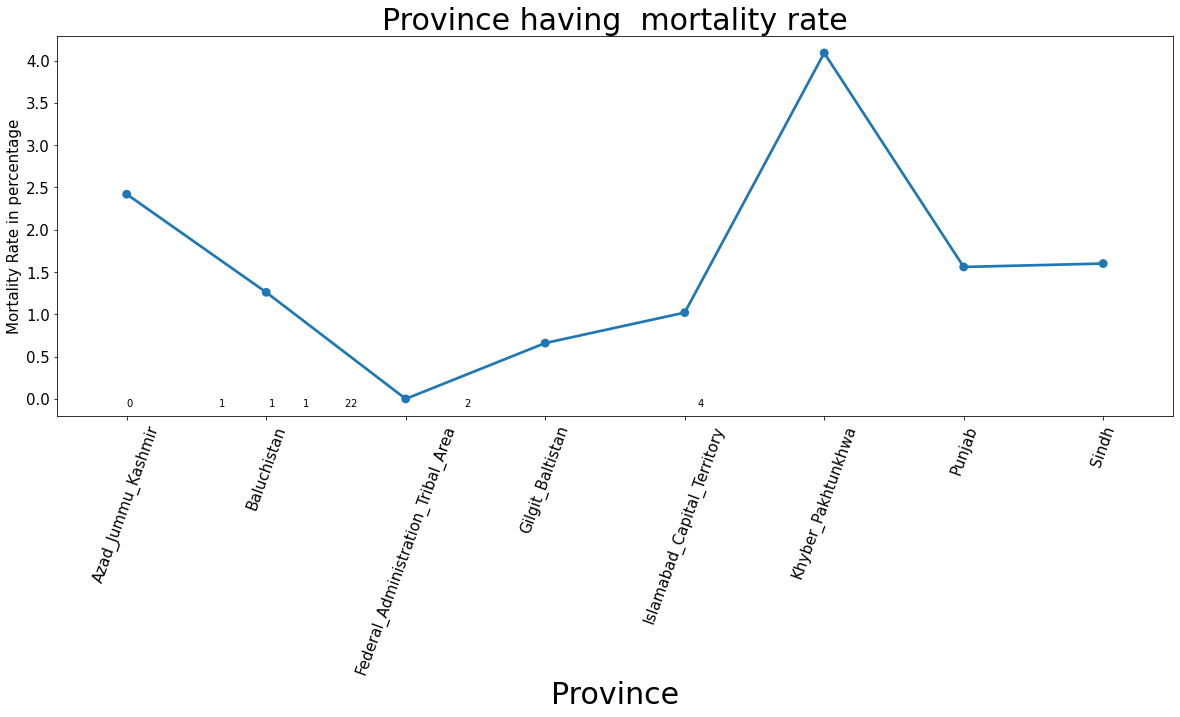

In [225]:
plt.figure(figsize= (20,7))
plt.xticks(rotation=70,fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("Total cases",fontsize = 15)
plt.xlabel('Province',fontsize = 30)
plt.title("Province having  mortality rate" , fontsize = 30)
ax = sns.pointplot(y = rate['Death percentage'], x= rate.Province)
for i, (value, name) in enumerate(zip(rate['Death percentage'], rate.Province)):
    ax.text(value,-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(ylabel='Mortality Rate in percentage', xlabel='Province')

Above Graph show that (KHYBER_PAKHTUNKHWA) have greater mortality rate.

In [226]:
top=CVD[CVD['Date'] ==CVD['Date']]
top_casualities = top.groupby(by = 'Travel_history')['Confirmed_cases'].sum().sort_values(ascending = False).reset_index()
top_casualities

,Travel_history,Confirmed_cases
0,Local_Social_Contact,55449
1,Unknown,3453
2,Tableeghi_Jamaat,1093
3,Iran_Taftan,1035
4,Jail,107
5,Afghanistan,70
6,International_Passenger,38
7,Syria,7
8,KSA,6
9,UK,5


[Text(0.5, 0, 'Total Confirmed Cases'), Text(0, 0.5, 'Travel_history')]

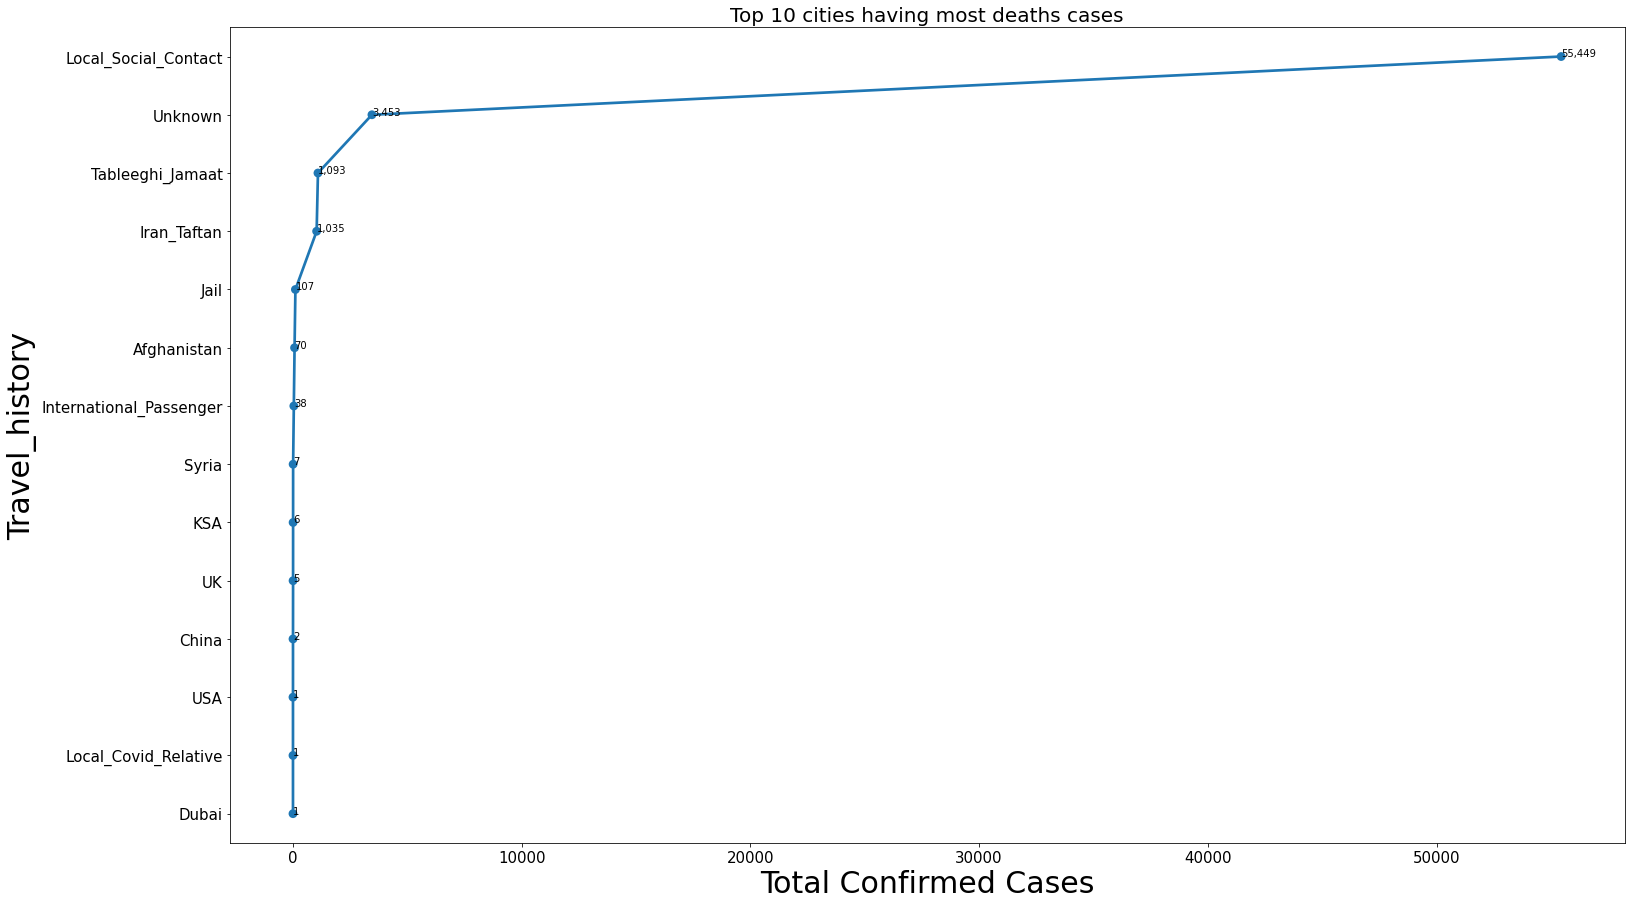

In [227]:
plt.figure(figsize= (25,15))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Confirmed",fontsize = 30)
plt.ylabel('Travel_history',fontsize = 30)
plt.title("Top 10 cities having most deaths cases" , fontsize = 20)
ax = sns.pointplot(x = top_casualities.Confirmed_cases, y =top_casualities.Travel_history)
for i, (value, name) in enumerate(zip(top_casualities.Confirmed_cases,top_casualities.Travel_history)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total Confirmed Cases', ylabel='Travel_history')

## <i>15. Show Cities having mortality rate and determine which city have more mortality rate</i>

### Numerical Visulaization

In [228]:
rate =CVD.groupby(by = 'City')[['Recovered_cases','Confirmed_cases','Deaths_cases']].sum().reset_index()
rate['Recovery percentage'] =  round(((rate['Recovered_cases']) / (rate['Confirmed_cases'])) * 100 , 2)
rate['Death percentage'] =  round(((rate['Deaths_cases']) / (rate['Confirmed_cases'])) * 100 , 2)
rate.head()


,City,Recovered_cases,Confirmed_cases,Deaths_cases,Recovery percentage,Death percentage
0,Abbottabad,29,277,12,10.47,4.33
1,Astore,7,69,1,10.14,1.45
2,Attock,0,15,0,0.00,0.00
3,Badin,3,56,1,5.36,1.79
4,Bahawal_Nagar,0,21,0,0.00,0.00


### Graphical Visualization

[Text(0, 0.5, 'Mortality Rate in percentage'), Text(0.5, 0, 'Cities')]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


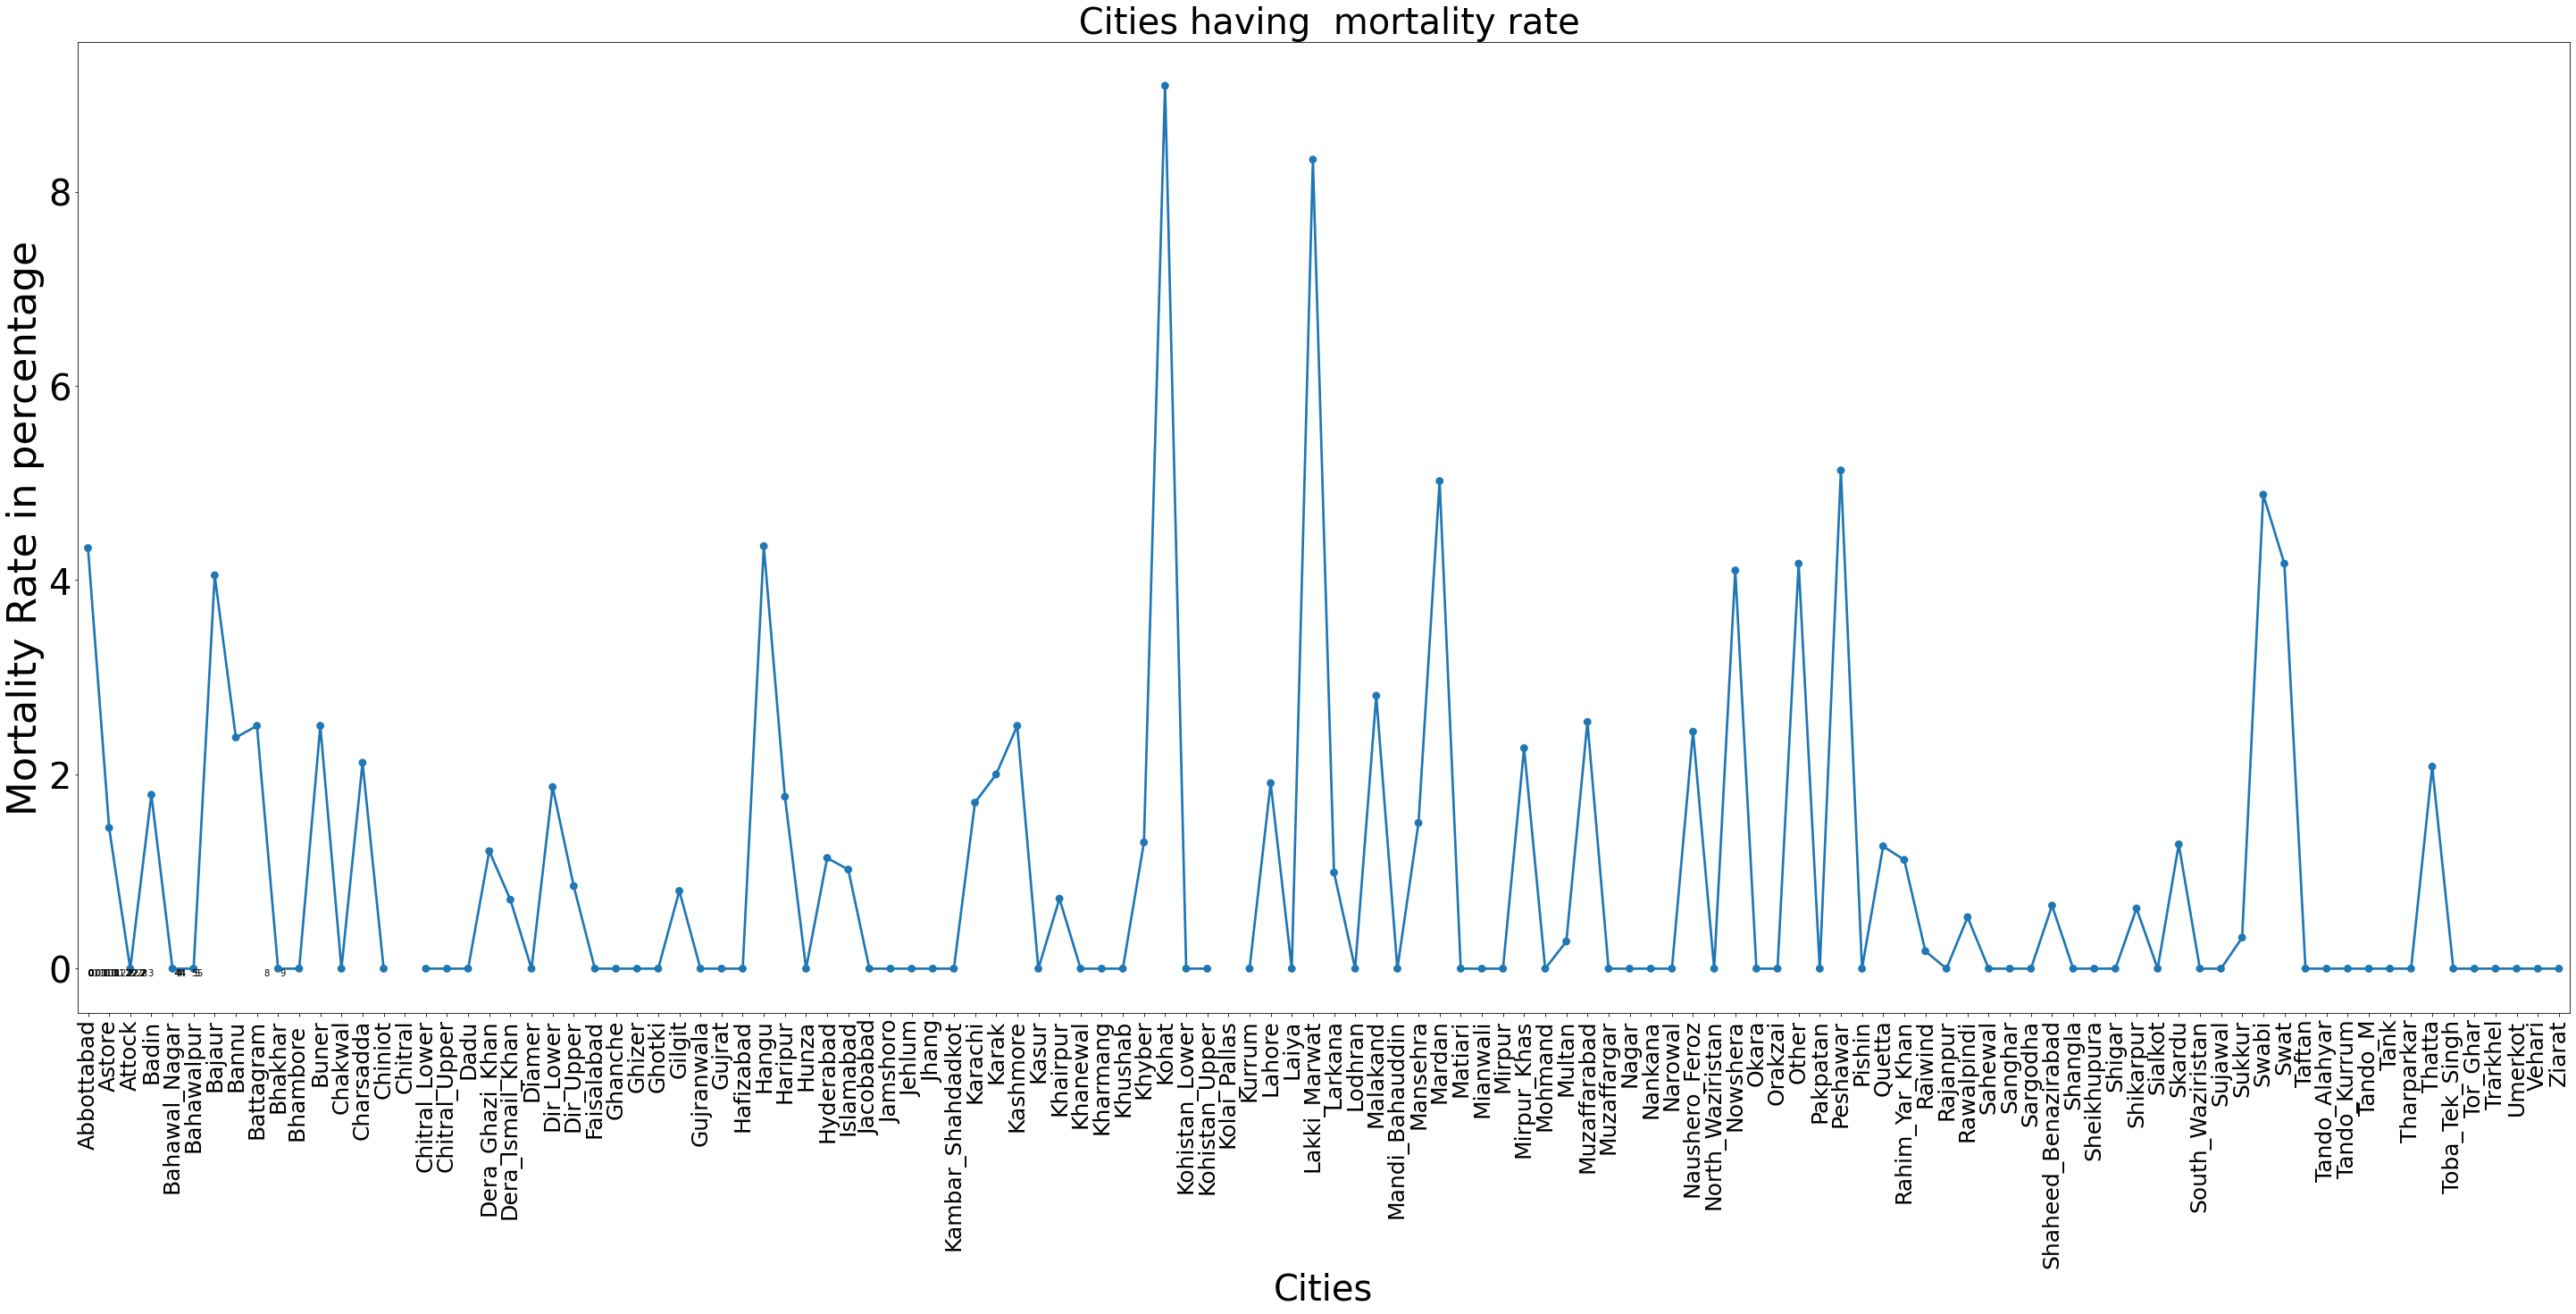

In [229]:
plt.figure(figsize= (50,20))
plt.xticks(rotation=90,fontsize = 25)
plt.yticks(fontsize = 40)
plt.ylabel("Total cases",fontsize = 45)
plt.xlabel('City',fontsize = 40)
plt.title(" Cities having  mortality rate" , fontsize = 40)
ax = sns.pointplot(x=rate.City,y = rate['Death percentage'])

for i, (value, name) in enumerate(zip(rate['Death percentage'] ,rate.City)):
    ax.text(value,-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(ylabel='Mortality Rate in percentage', xlabel='Cities')

above graph show kohat has high mortality rate

## 16).<i> Show that which province of country has most cases</i>

### Numercial Visualization

In [230]:
world=CVD.groupby('Province')[['Confirmed_cases','Active_cases','Deaths_cases','Recovered_cases']].sum().reset_index()
world

,Province,Confirmed_cases,Active_cases,Deaths_cases,Recovered_cases
0,Azad_Jummu_Kashmir,248,217,6,25
1,Baluchistan,2389,2127,30,232
2,Federal_Administration_Tribal_Area,52,49,0,3
3,Gilgit_Baltistan,758,688,5,65
4,Islamabad_Capital_Territory,3522,3029,36,457
5,Khyber_Pakhtunkhwa,9963,8591,407,965
6,Punjab,14574,13515,227,832
7,Sindh,29762,19686,477,9599


In [231]:
fig = px.line(world.sort_values('Active_cases', ascending=False)[:10][::-1], 
             x='Province', y='Active_cases', color_discrete_sequence=['#D63230'],
             title='Active cases', text='Active_cases', orientation='h')
fig.show()

The above graph show that sindh has more active,death cases now analyze  sidth province ad determine in which cities corona is affected more

## <i>17). Determine which city in sindh is more affected by covid</i>

### Numerical visualization

In [232]:
wrld=CVD[CVD['Province']=='Sindh']
world=wrld.groupby('City')[['Confirmed_cases','Active_cases','Deaths_cases','Recovered_cases']].sum().reset_index()
world

,City,Confirmed_cases,Active_cases,Deaths_cases,Recovered_cases
0,Badin,56,52,1,3
1,Dadu,48,37,0,11
2,Ghotki,356,300,0,56
3,Hyderabad,527,378,6,143
4,Jacobabad,60,53,0,7
5,Jamshoro,87,72,0,15
6,Kambar_Shahdadkot,48,33,0,15
7,Karachi,26685,17114,455,9116
8,Kashmore,40,38,1,1
9,Khairpur,276,262,2,12


### Graphical visualization

In [233]:
fig = px.line(world.sort_values('Active_cases', ascending=False)[:10][::-1], 
             x='City', y='Active_cases', color_discrete_sequence=['#D63230'],
             title='Affected cities in sindh', text='Active_cases', orientation='h')
fig.show()

Above graph shows that karachi is more affected city in pakistan

## <i>18.  Show Recovery cases  and Deaths cases  per 100 Confirmed Rate and determine which province has most  recovery cases and least death cases..</i>

In [234]:
cleaned_latest = CVD[CVD['Date'] == max(CVD['Date'])]
flg = cleaned_latest.groupby('Province')[['Confirmed_cases', 'Deaths_cases', 'Recovered_cases']].sum().reset_index()
flg['mortalityRate'] = round((flg['Deaths_cases']/flg['Confirmed_cases'])*100, 2)

print("Province with Lowest Mortality Rates")
temp = flg[flg['Confirmed_cases']>100]
temp = temp.sort_values('mortalityRate', ascending=True)[['Confirmed_cases', 'Province','Deaths_cases']][:16]
temp.sort_values('Confirmed_cases', ascending=False)[['Province', 'Confirmed_cases','Deaths_cases']][:20].style.background_gradient(cmap='Greens')


Province with Lowest Mortality Rates


,Province,Confirmed_cases,Deaths_cases
3,Sindh,1824,29
2,Khyber_Pakhtunkhwa,458,10
1,Islamabad_Capital_Territory,356,4


## <i> 19.  RECOVERY PER 100 CONFIRMED RATE</i>

In [235]:
flg['RecoveryRate'] = round((flg['Recovered_cases']/flg['Confirmed_cases'])*100, 2)
temp = flg[flg['Confirmed_cases']>100]
temp = temp.sort_values('RecoveryRate', ascending=False)

fig = px.bar(temp.sort_values(by="RecoveryRate", ascending=False)[:10][::-1],
             x = 'RecoveryRate', y = 'Province', 
             title='Recoveries per 100 Confirmed Cases', text='RecoveryRate', height=500, orientation='h',
             color_discrete_sequence=['#2c1a9c']
            )
fig.show()

## <i> 20)- DEATH PER 100 CONFIRMED RATE</i>

In [236]:
flg['DeathsRate'] = round((flg['Deaths_cases']/flg['Confirmed_cases'])*100, 2)
temp = flg[flg['Confirmed_cases']>100]
temp = temp.sort_values('DeathsRate', ascending=False)

temp

,Province,Confirmed_cases,Deaths_cases,Recovered_cases,mortalityRate,RecoveryRate,DeathsRate
2,Khyber_Pakhtunkhwa,458,10,57,2.18,12.45,2.18
3,Sindh,1824,29,483,1.59,26.48,1.59
1,Islamabad_Capital_Territory,356,4,119,1.12,33.43,1.12


In [237]:
fig = px.bar(temp.sort_values(by="DeathsRate", ascending=False)[:10][::-1],
             x = 'DeathsRate', y = 'Province', 
             title='Deaths per 100 Confirmed Cases', text='DeathsRate', height=500, orientation='h',
             color_discrete_sequence=['#2aa19a']
            )
fig.show()

Above graphs show that in per 100 confirmed cases,  patients recovery in Islamabad Territory is more than other province. And patients deaths in khyber pakhtunkhwa is more than any other province

# Correlation

In [238]:
Corelation = CVD.corr()
Corelation


,Confirmed_cases,Deaths_cases,Recovered_cases,Active_cases
Confirmed_cases,1.000000,0.775857,0.717063,0.918170
Deaths_cases,0.775857,1.000000,0.593583,0.680828
Recovered_cases,0.717063,0.593583,1.000000,0.382481
Active_cases,0.918170,0.680828,0.382481,1.000000


In [ ]:
top_fatures = Corelation.index
plt.figure(figsize = (9 , 5))
g = sns.heatmap(CVD[top_fatures].corr() , annot = True , cmap ='CMRmap_r')